In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/House-Price.csv', header=0)

## Data Preprocessing

### Data Analysis

In [18]:
df.head(5)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [19]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

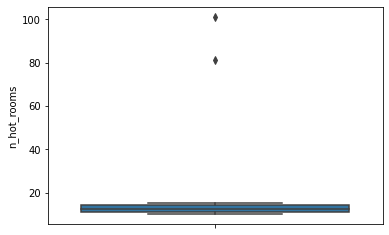

In [21]:
sns.boxplot(y='n_hot_rooms', data=df)

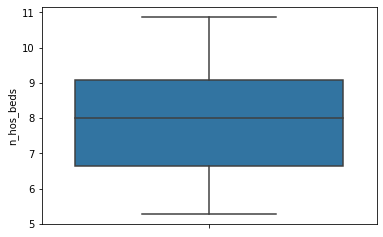

In [22]:
sns.boxplot(y='n_hos_beds', data=df)

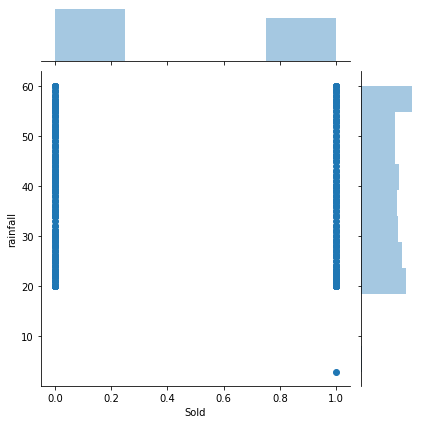

In [23]:
sns.jointplot(x='Sold', y='rainfall', data=df)

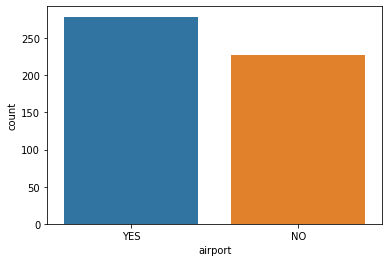

In [24]:
sns.countplot(data=df, x='airport')

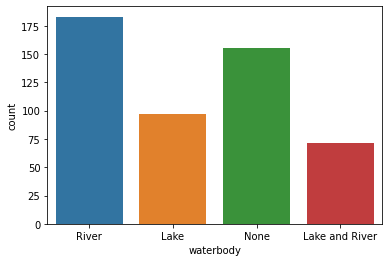

In [25]:
sns.countplot(data=df, x='waterbody')

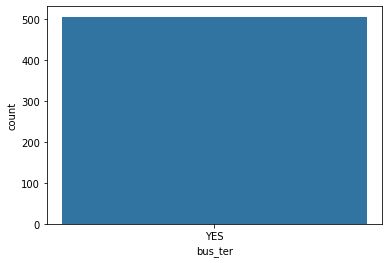

In [26]:
sns.countplot(data=df, x='bus_ter')

### Observations

-> missing values in n_hos_beds

-> bus_ter is redundant info

-> n_hot_rooms and rainfall have outliers

### Data Cleaning

In [27]:
np.percentile(df.n_hot_rooms, [99])

array([15.39952])

In [28]:
upper = np.percentile(df.n_hot_rooms, [99])[0]
df[df.n_hot_rooms>upper]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [29]:
df.n_hot_rooms[df.n_hot_rooms>upper*3] = upper*3
df[df.n_hot_rooms>upper]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344,0


In [30]:
np.percentile(df.rainfall, [1])

array([20.])

In [31]:
lower = np.percentile(df.rainfall, [1])[0]
df[df.rainfall<lower]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019,1


In [32]:
df.rainfall[df.rainfall<lower*0.3] = 0.3*lower

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df[df.rainfall<lower]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019,1


In [34]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000


In [36]:
np.sum(df.n_hos_beds.isna())

8

In [38]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())
np.sum(df.n_hos_beds.isna())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   506 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [39]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4)/4
df.head(5)

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,0,6.0625


In [0]:
labels = ['dist' + str(i) for i in range(1,5)]

In [56]:
for label in labels:
    del df[label]
df.head(5)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,YES,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,YES,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,YES,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,YES,0.039474,0,6.0625


In [57]:
df.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454,0.454545,3.795104
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,2.688778,12.497221,0.010632,0.498422,2.105859
min,5.000000,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292,0.000000,1.127500
25%,17.025000,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,0.000000,2.100625
50%,21.200000,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,0.000000,3.207500
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,1.000000,5.187500
max,50.000000,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711,1.000000,12.127500


In [58]:
df = pd.get_dummies(df)
df.head(5)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,0,1,0,0,0,1,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,1,0,1,0,0,0,1
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,1,0,0,0,1,0,1
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,0,1,1,0,0,0,1
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,1,0,1,0,0,0,1


In [60]:
del df['airport_NO']
del df['waterbody_None']
del df['bus_ter_YES']
df.head(5)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


## Models

### Logistic Regression

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [72]:
y = df.Sold
y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [0]:
X = df
del X['Sold']

In [76]:
X.head(5)

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,6.0625,0,1,0,0


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 16) (102, 16) (404,) (102,)


In [0]:
clf_lgr = LogisticRegression()

In [97]:
clf_lgr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
print(clf_lgr.coef_[0])
print(clf_lgr.intercept_[0])

[-0.27006516 -0.01948631 -0.19806871  0.97152114 -0.0064835   0.26882773
 -0.22874607  0.16724193 -0.1273351  -0.00215405 -0.00135509 -0.37571147
 -0.09067195 -0.00767606  0.1748049   0.0284645 ]
-0.009482955380655148


In [0]:
from sklearn.metrics import accuracy_score, mean_absolute_error


In [100]:
y_pred_log = clf_lgr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)
mae = mean_absolute_error(y_test, y_pred_log)
print(accuracy)
print(mae)

0.6764705882352942
0.3235294117647059


In [0]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test, y_pred_log)

In [114]:
print(cm_log)

[[33 23]
 [10 36]]


In [0]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score

In [104]:
recall = recall_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
roc = roc_auc_score(y_test, y_pred_log)
print('Recall: ', recall)
print('Precision: ', precision)
print('ROC AUC: ', roc)

Recall:  0.782608695652174
Precision:  0.6101694915254238
ROC AUC:  0.6859472049689441


### Linear Discriminant Analysis (LDA)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_qda = QuadraticDiscriminantAnalysis()

In [109]:
clf_lda.fit(X_train, y_train)
y_pred_lda = clf_lda.predict(X_test)
cm_lda = confusion_matrix(y_test, y_pred)
print(cm_lda)

[[33 23]
 [10 36]]


In [110]:
accuracy_score(y_test, y_pred_lda)

0.6470588235294118

In [111]:
recall_score(y_test, y_pred_lda)

0.717391304347826

In [112]:
roc_auc_score(y_test, y_pred_lda)

0.6533385093167703

In [115]:
clf_qda.fit(X_train, y_train)
y_pred_qda = clf_qda.predict(X_test)
cm_qda = confusion_matrix(y_test, y_pred_qda)
print(cm_qda)

[[31 25]
 [15 31]]


In [116]:
accuracy_score(y_test, y_pred_qda)

0.6078431372549019

In [117]:
recall_score(y_test, y_pred_qda)

0.6739130434782609

In [118]:
roc_auc_score(y_test, y_pred_qda)

0.6137422360248447

### K Nearest Neighbours (KNN)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
clf_knn.fit(X_train_scaled, y_train)
accuracy_score(y_test, clf_knn.predict(X_test_scaled))

0.5980392156862745

In [129]:
cm_knn_1 = confusion_matrix(y_test, clf_knn.predict(X_test_scaled))
print(cm_knn_1)

[[35 21]
 [20 26]]


In [130]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_scaled, y_train)
cm_knn_3 = confusion_matrix(y_test, clf_knn_3.predict(X_test_scaled))
print(cm_knn_3)
print(accuracy_score(y_test, clf_knn_3.predict(X_test_scaled)))

[[36 20]
 [25 21]]
0.5588235294117647


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [0]:
gsv = grid_search_cv

In [137]:
gsv.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
gsv.best_params_

{'n_neighbors': 9}

In [0]:
clf_knn_best = gsv.best_estimator_

In [0]:
y_pred_knn = clf_knn_best.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
roc_knn = roc_auc_score(y_test, y_pred_knn)

In [143]:
print(cm_knn)

[[42 14]
 [34 12]]


In [144]:
print('Accuracy: ', accuracy_knn)
print('Recall: ', recall_knn)
print('Precision: ', precision_knn)
print('ROC AUC: ', roc_knn)

Accuracy:  0.5294117647058824
Recall:  0.2608695652173913
Precision:  0.46153846153846156
ROC AUC:  0.5054347826086957
